In [12]:
# -*- coding: utf-8 -*-
pip install scipy==1.2.0
from scipy import ndimage
from scipy import misc
import numpy
from matplotlib import pyplot
from PIL import Image
import scipy.misc


SyntaxError: invalid syntax (<ipython-input-12-4ec561fafa66>, line 2)

In [4]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
import keras.layers
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
#K.set_image_dim_ordering('th')

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 96s 1us/step


In [6]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# normalize inputs from 0-255 to 0.0-1.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

TypeError: Cannot handle this data type: (1, 1, 3), <f4

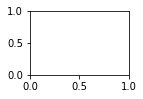

In [10]:
for i in range(0, 9):
 pyplot.subplot(330 + 1 + i)
 pyplot.imshow(Image.fromarray(X_train[i]))
# show the plot
pyplot.show()

In [ ]:
kedi = ndimage.imread("kedi.jpg")
kedi = scipy.misc.imresize(kedi,(32,32))
kedi = numpy.array(kedi)
print("jfjef")
kedi = kedi.reshape(1,3,32,32)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(1000, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Compile model
epochs = 300
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

In [ ]:
model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

print("---------------")

print(model.predict_classes(kedi))